In [1]:
import numpy as np
import pandas as pd
import gzip
import os
import zipfile
import openrouteservice
client = openrouteservice.Client(key='5b3ce3597851110001cf624802e069d6633748a5ae4e9842334f1dc2') # Specify your personal API key
from openrouteservice import client
from openrouteservice.exceptions import ApiError

In [2]:
# Your directory path
directory_path = r"C:\Users\leonw\OneDrive - KU Leuven\Datathon\Data2024"

# Initialize an empty dictionary to hold your data
data = {}

# List all files and read relevant ones into the dictionary
for filename in os.listdir(directory_path):
    if filename.endswith(".parquet") or filename.endswith(".parquet.gzip"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        # Remove the file extension and replace underscores with spaces for the key
        key_name = filename.replace('.parquet.gzip', '').replace('.parquet', '').replace('_', ' ')
        # Read the file into a DataFrame
        data[key_name] = pd.read_parquet(file_path)

In [3]:
aed_loc = data['aed locations']
amb_loc = data['ambulance locations']
cad9_loc = data['cad9']
intvn_bxl1 = data['interventions bxl']
intvn_bxl2 = data['interventions bxl2']
intvn1 = data['interventions1']
intvn2 = data['interventions2']
intvn3 = data['interventions3']
mug_loc = data['mug locations']
pit_loc = data['pit locations']

In [4]:
df = pd.DataFrame(columns = ['Name', 'longitude', 'latitude'])

In [5]:
amb_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       279 non-null    object 
 1   medical_resource           279 non-null    object 
 2   province                   266 non-null    object 
 3   region                     279 non-null    object 
 4   departure_location         279 non-null    object 
 5   departure_location_number  279 non-null    int64  
 6   latitude                   279 non-null    float64
 7   longitude                  279 non-null    float64
 8   occasional_permanence      279 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.7+ KB


In [6]:
pd.unique(amb_loc['province'])

array(['Antwerpen', None, 'Waals-Brabant', 'Luik', 'Henegouwen',
       'Limburg', 'Namen', 'Oost-Vlaanderen', 'Vlaams-Brabant',
       'West-Vlaanderen', 'Luxemburg'], dtype=object)

In [7]:
Ambulances = amb_loc[amb_loc['province']=='Vlaams-Brabant']

In [8]:
# Only keep rows that contain 30 as all postla code of Leuven start with 30
Ambulances = Ambulances[Ambulances['departure_location'].str.contains('30')]

In [9]:
Ambulances = Ambulances.reset_index(drop = True)

In [10]:
Ambulances

base  \
0               BV LEUV 112 Hageland   
1                 BV LEUV Rode Kruis   
2                     BV LIED AMBUCE   
3   BV ZAVE Brussels Airport Company   
4                   FV HVP LEUV Oost   
5                   FV HVP OVER Oost   
6                   FV HVP TIEN Oost   
7                   FV HVP ZAVE West   
8          HV UR LEUV RZ HEILIG HART   
9         HV UR LEUV UZ Gasthuisberg   
10                  FV HVP ASSE West   

                                     medical_resource        province  \
0                     ZW HEVERLEE 2 (Team: AVLEUV02A)  Vlaams-Brabant   
1                    ZW LEUVEN RK 1 (Team: AVLEUV01B)  Vlaams-Brabant   
2                     ZW LIEDEKERKE (Team: AVLIED01A)  Vlaams-Brabant   
3                        ZW AIRPORT (Team: AVZAIR01A)  Vlaams-Brabant   
4   ZW LEUVEN 3 (Team: AVLEUV03A)_x000D_ZW LEUVEN ...  Vlaams-Brabant   
5   ZW OVERIJSE 1 (Team: AVOVER01A)_x000D_ZW OVERI...  Vlaams-Brabant   
6   ZW TIENEN 1 (Team: AVTIEN01A)_x000D_ZW TIENEN ...  Vlaams-Brabant   
7   ZW ZAVENTEM 1 (Team: AVZAVE01A)_x000D_ZW ZAVEN...  Vlaams-Brabant   
8                    ZW LEUVEN VK 1 (Team: AVLEUV01A)  Vlaams-Brabant   
9                       PIT TIH GHB (Team: PVLEUV04A)  Vlaams-Brabant   
10  ZW ASSE (Team: AVASSE01A)_x000D_ZW ASSE 2 (Tea...  Vlaams-Brabant   

           region                     departure_location  \
0   Vlaams Gewest     Korbeek-Losestraat 117 3001 LEUVEN   
1   Vlaams Gewest  Onze Lieve Vrouwstraat 44 3000 LEUVEN   
2   Vlaams Gewest        Kapellenbaan 30 1770 LIEDEKERKE   
3   Vlaams Gewest  Hulpppost Noord 1930 ZAVENTEM AIRPORT   
4   Vlaams Gewest           Terbankstraat 20 3001 LEUVEN   
5   Vlaams Gewest              Schavei  77 3090 OVERIJSE   
6   Vlaams Gewest       Diestsesteenweg  360 3300 TIENEN   
7   Vlaams Gewest               Hoge Wei 2 1930 ZAVENTEM   
8   Vlaams Gewest           Naamsestraat 105 3000 LEUVEN   
9   Vlaams Gewest             Herestraat  49 3001 LEUVEN   
10  Vlaams Gewest            Asphaltcosite 110 1730 ASSE   

    departure_location_number   latitude  longitude occasional_permanence  
0                       25403  50.869655   4.724344                     N  
1                        3521  50.878535   4.695398                     N  
2                        3820  50.868004   4.098320                     N  
3                       26401  50.879821   4.472760                     N  
4                       23001  50.877460   4.665862                     N  
5                       23005  50.777013   4.527038                     N  
6                       23003  50.823648   4.937178                     N  
7                       24006  50.875499   4.500188                     N  
8                       26301  50.872354   4.699833                     N  
9                       28801  50.878079   4.673199                     N  
10                      24004  50.908000   4.209889                     Y

In [11]:
df['Name'] = Ambulances['departure_location_number']
df['longitude'] = Ambulances['longitude']
df['latitude'] = Ambulances['latitude']

In [12]:
df

Name  longitude   latitude
0   25403   4.724344  50.869655
1    3521   4.695398  50.878535
2    3820   4.098320  50.868004
3   26401   4.472760  50.879821
4   23001   4.665862  50.877460
5   23005   4.527038  50.777013
6   23003   4.937178  50.823648
7   24006   4.500188  50.875499
8   26301   4.699833  50.872354
9   28801   4.673199  50.878079
10  24004   4.209889  50.908000

In [13]:
pd.unique(pit_loc['province'])

array(['Antwerpen/Anvers', 'Oost-Vlaanderen/Flandre orientale',
       'Vlaams Brabant/Brabant flamand',
       'West-Vlaanderen/Flandre occidentale', 'Limburg/Limbourg', None,
       'Henegouwen/Hainaut', 'Namen/Namur', 'Luik/Liège',
       'Luxemburg/Luxembourg'], dtype=object)

In [14]:
Pit = pit_loc[pit_loc['province']=='Vlaams Brabant/Brabant flamand']
Pit.reset_index()

index                               unit  \
0      6              210001: PIT ASSE, OLV   
1     11  501001: PIT Leuven, Gasthuisberg    

                                              campus  \
0  Ziekenhuis/Hôpital: 126 - ONZE-LIEVE-VROUW ZIE...   
1  Ziekenhuis/Hôpital: 322 - UZ LEUVEN --- Campus...   

                         province              region    unit_id  ambucode  \
0  Vlaams Brabant/Brabant flamand  Vlaanderen/Flandre  PVASSE01A       480   
1  Vlaams Brabant/Brabant flamand  Vlaanderen/Flandre  PVLEUV01A       288   

   ambusitecode  link  
0         48001  None  
1         28801  None

In [15]:
# Only the second one is in Leuven

In [16]:
Pit = Pit[Pit['ambucode']==288]

In [17]:
Pit = Pit.reset_index(drop = True)

In [18]:
Pit['campus'][0]

'Ziekenhuis/Hôpital: 322 - UZ LEUVEN --- Campus/Site: 4230 - GASTHUISBERG'

In [19]:
df_2 = pd.DataFrame()
df_2['Name'] = Pit['unit_id']
df_2['longitude'] = 4.671651874790573
df_2['latitude'] = 50.879170226125666

In [20]:
df_2

Name  longitude  latitude
0  PVLEUV01A   4.671652  50.87917

In [21]:
pd.unique(mug_loc['province'])

array(['Antwerpen', 'Oost-Vlaanderen', 'West-Vlaanderen', 'Limburg',
       'Vlaams-Brabant', 'Brussels Hoofdstedelijk Gewest',
       'Waals-Brabant', 'Henegouwen', 'Namen', 'Luik', 'Lüttich',
       'Luxemburg'], dtype=object)

In [22]:
Mug = mug_loc[mug_loc['province']=='Vlaams-Brabant']

In [23]:
Mug.head()

hospital_id  mug_id  campus_id                   name_hospital  \
44          106  500000       1340  ALGEMEEN ZIEKENHUIS SINT-MARIA   
45          322  501000       4230                       UZ LEUVEN   
46          204  502000       1460                 AZ JAN PORTAELS   
47          109  503000       1370           RZ HEILIG HART TIENEN   
48          712  504000       1320                        AZ DIEST   

     name_campus        address_campus  postal_code municipality region  \
44          None    ZIEKENHUISLAAN 100         1500        HALLE      V   
45  GASTHUISBERG         HERESTRAAT 49         3000       LEUVEN      V   
46          None  GENDARMERIESTRAAT 65         1800    VILVOORDE      V   
47     MARIENDAL      KLINIEKSTRAAT 45         3300       TIENEN      V   
48          None       STATIESTRAAT 65         3290        DIEST      V   

          province  
44  Vlaams-Brabant  
45  Vlaams-Brabant  
46  Vlaams-Brabant  
47  Vlaams-Brabant  
48  Vlaams-Brabant

In [24]:
# Only Leuven postal code starts with 3000

In [25]:
Mug = Mug[Mug['postal_code']==3000]

In [26]:
Mug = Mug.reset_index(drop = True)

In [27]:
Mug.head()

hospital_id  mug_id  campus_id name_hospital   name_campus address_campus  \
0          322  501000       4230     UZ LEUVEN  GASTHUISBERG  HERESTRAAT 49   

   postal_code municipality region        province  
0         3000       LEUVEN      V  Vlaams-Brabant

In [28]:
df_3 = pd.DataFrame()
df_3['Name'] = Mug['hospital_id']
df_3['longitude'] = 4.669060381545932
df_3['latitude'] = 50.87843614224022

In [29]:
 df_vectors = pd.concat([df, df_2, df_3], ignore_index = True)

In [30]:
df_vectors

Name  longitude   latitude
0       25403   4.724344  50.869655
1        3521   4.695398  50.878535
2        3820   4.098320  50.868004
3       26401   4.472760  50.879821
4       23001   4.665862  50.877460
5       23005   4.527038  50.777013
6       23003   4.937178  50.823648
7       24006   4.500188  50.875499
8       26301   4.699833  50.872354
9       28801   4.673199  50.878079
10      24004   4.209889  50.908000
11  PVLEUV01A   4.671652  50.879170
12        322   4.669060  50.878436

In [31]:
df_vectors['coordinates'] =  list(zip(df_vectors.loc[:,'longitude'], df_vectors.loc[:,'latitude']))

In [32]:
coordinates = pd.unique(df_vectors['coordinates'])

In [104]:
def isochrone(Location, range, profile = "foot-walking"):
        # patient must be a tuple
        # AEDS must be a dataframe with columns (This is gathered in another file) named latitude and longitude
        # profile by default is walking by foot
        Client_ors = openrouteservice.Client(key='5b3ce3597851110001cf624802e069d6633748a5ae4e9842334f1dc2')
        # set the parameters for conducting an isochrone search
        isochrones_parameters = {
        'locations': [Location],
        'profile': profile,
        'range_type': 'time',
        'range': [range] # 10 minutes away (600 seconds)
        }
        # Get the area that can be reached in 10 minutes walking.
        # This creates an isochrone wich is the whole area surounding the patient that is reachable in 10 minutes by foot.
        # 10 minutes are taken as most research assumes that 8 minutes is the longest time
        # first responders should take. As we assume the responders to walk faster than normal,
        # a 10 minute radius should be fine.
        isochrone = Client_ors.isochrones(**isochrones_parameters)

        # Transform the isochrone into a polygon and add it to a Geo Data Frame
        lon = list(list(zip(*isochrone['features'][0]['geometry']['coordinates'][0]))[0])
        lat = list(list(zip(*isochrone['features'][0]['geometry']['coordinates'][0]))[1])
        dict = {'lon':lon,'lat':lat}
        df_latlong = pd.DataFrame(dict)
        # Returns a list of tuples of the coordinates of the responders.
        return df_latlong

In [105]:
spacer = {'lon':None, 'lat':None}
spacer
spacer_df = pd.DataFrame(spacer, index=[0])

In [106]:
len(coordinates)

7

In [109]:
g=[isochrone(coordinates[1], 300, profile = "driving-car"), spacer_df, isochrone(coordinates[2], 300, profile = "driving-car"), spacer_df,
   isochrone(coordinates[3], 300, profile = "driving-car"), spacer_df, isochrone(coordinates[4], 300, profile = "driving-car"), spacer_df,
   isochrone(coordinates[5], 300, profile = "driving-car"), spacer_df, isochrone(coordinates[0], 300, profile = "driving-car"), spacer_df,
   isochrone(coordinates[6], 300, profile = "driving-car")]


In [110]:
merged_poly = pd.concat(g, axis=0, join='outer')

C:\Users\leonw\AppData\Local\Temp\ipykernel_4036\4197315751.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_poly = pd.concat(g, axis=0, join='outer')


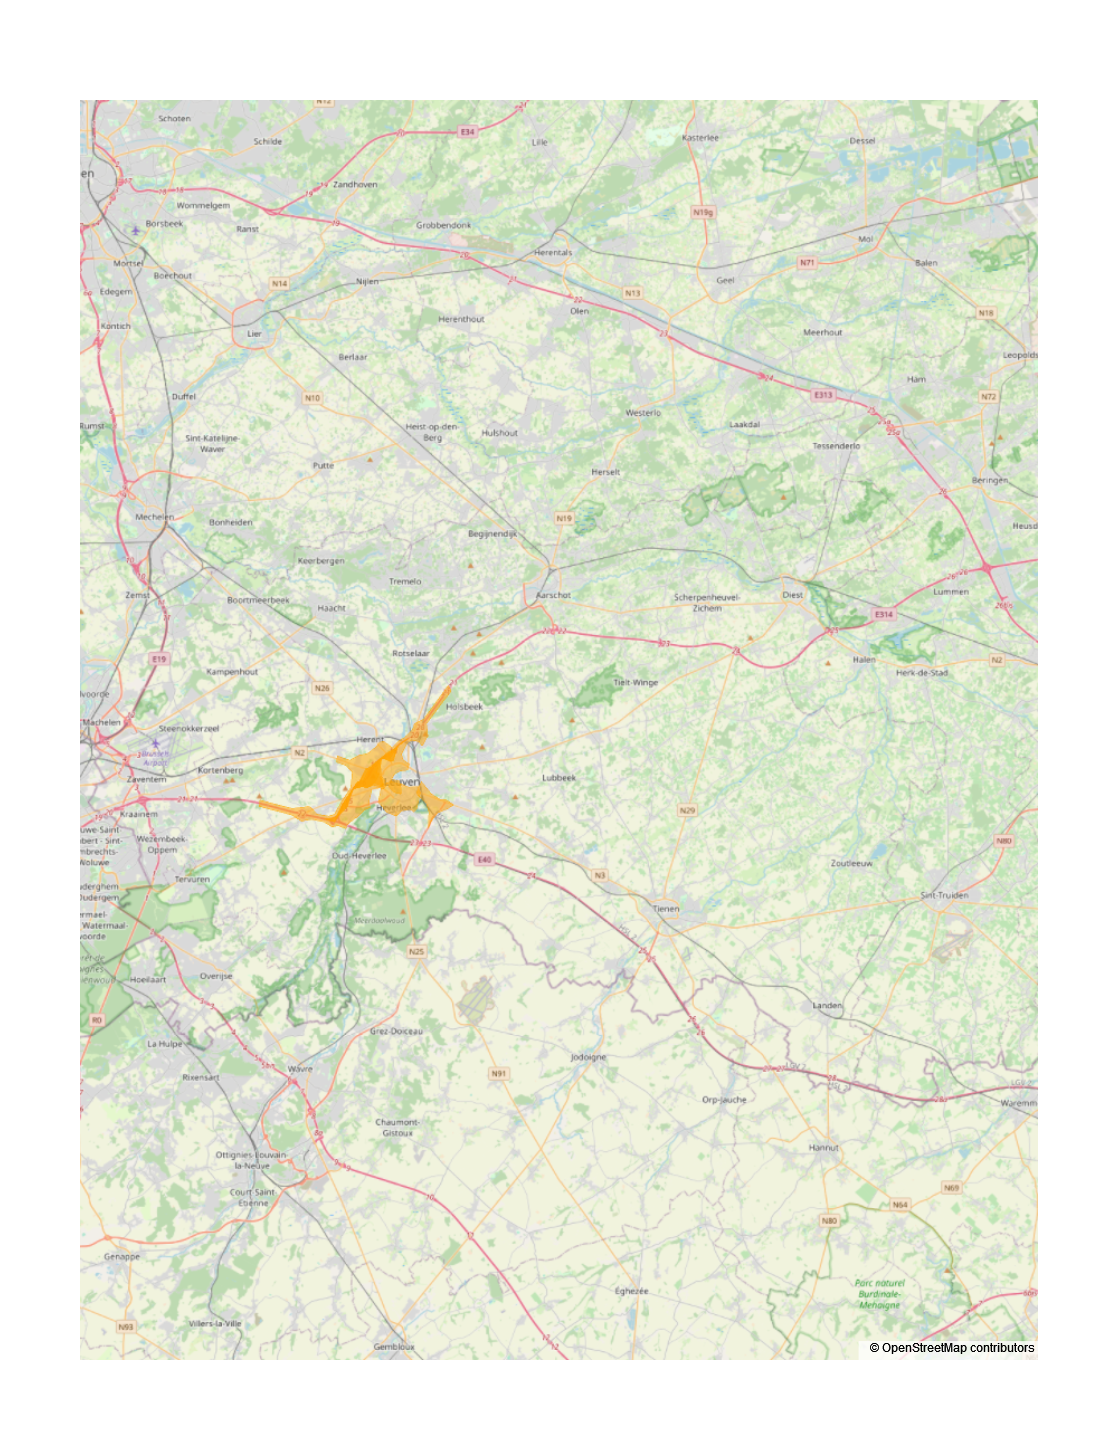

In [112]:
import plotly.graph_objects as go

# Assuming merged_poly contains the polygon data
# Create a dictionary containing the properties of the scattermapbox trace
scattermapbox_trace = {
    'fill': 'toself',
    'lon': merged_poly['lon'],
    'lat': merged_poly['lat'],
    'mode': 'markers',  # Ensure you set the mode to 'markers' or 'lines'
    'marker': {'size': 1, 'color': 'orange'}
}





# Construct the Scattermapbox trace using the dictionary
scattermapbox_trace = go.Scattermapbox(scattermapbox_trace)

# Create the figure
fig = go.Figure(scattermapbox_trace)
# Update layout settings
fig.update_layout(
    mapbox = {
        'style': "open-street-map",
        'center': {'lon': 4.5, 'lat': 50.87 },
        'zoom': 8},
    showlegend = False
)

# Show the figure
fig.show()

In [33]:
Vectors = df_vectors[['longitude', 'latitude']]

In [34]:
Vectors

longitude   latitude
0    4.724344  50.869655
1    4.695398  50.878535
2    4.098320  50.868004
3    4.472760  50.879821
4    4.665862  50.877460
5    4.527038  50.777013
6    4.937178  50.823648
7    4.500188  50.875499
8    4.699833  50.872354
9    4.673199  50.878079
10   4.209889  50.908000
11   4.671652  50.879170
12   4.669060  50.878436

In [35]:
50.93798393900126
50.84388865628919
50.880885568106955, 4.649798891199396
50.877749601448144, 4.800695064336869

(50.877749601448144, 4.800695064336869)

In [36]:
# Generate 80 random lat and long
N=1000
lon = np.random.uniform( 4.639798891199396,4.800695064336869,N)
lat = np.random.uniform(50.84388865628919,50.93798393900126,N)

# Create dataframe from the numpy arrays
responder = pd.DataFrame({'longitude':lon, 'latitude':lat})

N=200
lon = np.random.uniform(4.639798891199396,4.800695064336869,N)
lat = np.random.uniform(50.84388865628919,50.93798393900126,N)

# Create geodataframe from numpy arrays
aed = pd.DataFrame({'longitude':lon, 'latitude':lat})

# Generate 80 random lat and long
N=5
lon = np.random.uniform(4.639798891199396,4.800695064336869,N)
lat = np.random.uniform(50.84388865628919,50.93798393900126,N)

# Create dataframe from the numpy arrays
Patient = pd.DataFrame({'longitude':lon, 'latitude':lat})
Patient['coordinates'] = list(zip(Patient['longitude'], Patient['latitude']))

In [37]:
import openrouteservice
import numpy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import geometry
from openrouteservice import client
import plotly.express as px
import time
import geopy.distance
import plotly.graph_objects as go

In [38]:
import openrouteservice
from Simulation_Class import simulation

In [39]:
test = simulation()

In [52]:
df_final = test.fastest_time(Patient, responder, aed, Vectors)

Comparing resopnders vs. vectors
Duration for responders found
You did a lot take a 90 second break.
Duration for AEDs found
Fastest Direct and Indirect are the same
Duration for Vectors found
Time to sleep even longer otherwise the API gets tired.


C:\Users\leonw\OneDrive - KU Leuven\Documents\GitHub\AED-Route-Optimization-MDA-Project\Simulation_Class.py:135: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_duration= pd.concat([df_duration, df_comp_i], ignore_index = True)


Comparing resopnders vs. vectors
Duration for responders found
You did a lot take a 90 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Duration for Vectors found
Time to sleep even longer otherwise the API gets tired.
Comparing resopnders vs. vectors
Duration for responders found
You did a lot take a 90 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Duration for Vectors found
Time to sleep even longer otherwise the API gets tired.
Comparing resopnders vs. vectors
Duration for responders found
You did a lot take a 90 second break.
Duration for AEDs found
Fastest Direct and Indirect are not the same
Duration for Vectors found
Time to sleep even longer otherwise the API gets tired.


IndexError: list index out of range

In [41]:
Responders_loc = test.closest_location(Patient, responder,threshold=600)
subset_responder = [Responders_loc[Responders_loc.loc[:,'patient']==i] for i in range(len(pd.unique(Responders_loc['patient'])))]



In [49]:
len(subset_responder[2])

3

In [45]:
Vector_loc = test.closest_location(Patient, Vectors, profile = 'driving-car', threshold = 600)
subset_vector = [Vector_loc[Vector_loc.loc[:,'patient']==i] for i in range(len(pd.unique(Vector_loc['patient'])))]

In [48]:
len(subset_vector[2])

7

In [50]:
len(Patient)

5

In [79]:
dict = {'time':[1,1,1,10,3,4]}

In [80]:
df = pd.DataFrame(dict)

In [81]:
df

time
0     1
1     1
2     1
3    10
4     3
5     4

In [82]:
df.iloc[df['time'].nsmallest(2).index[1]]['time']

1

In [83]:
df.iloc[df.drop_duplicates(subset=['time']).nsmallest(2,'time').index[1]]['time']

3